# Iris Flower Classification

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
data.head(5)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.duplicated().sum()

3

In [8]:
data.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

<Axes: ylabel='count'>

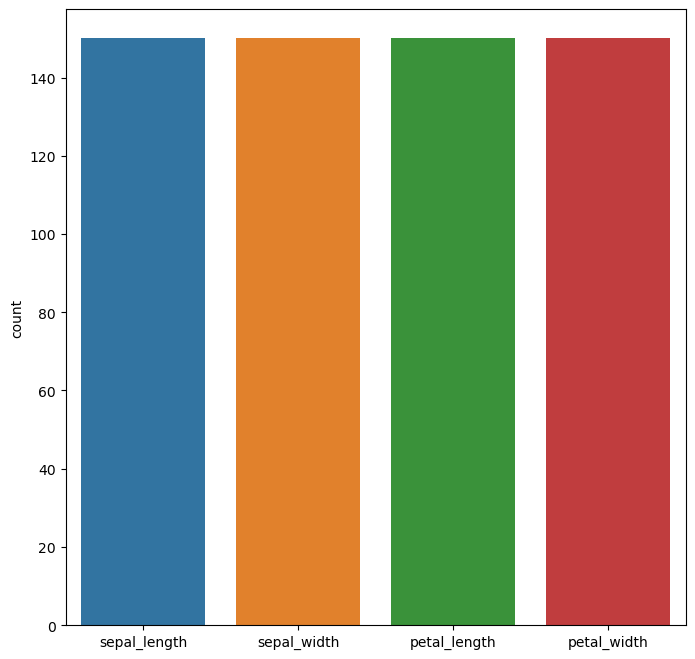

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(data=data)

C:\Users\Rani\AppData\Local\Temp\ipykernel_2356\3834749199.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidths=1)


<Axes: >

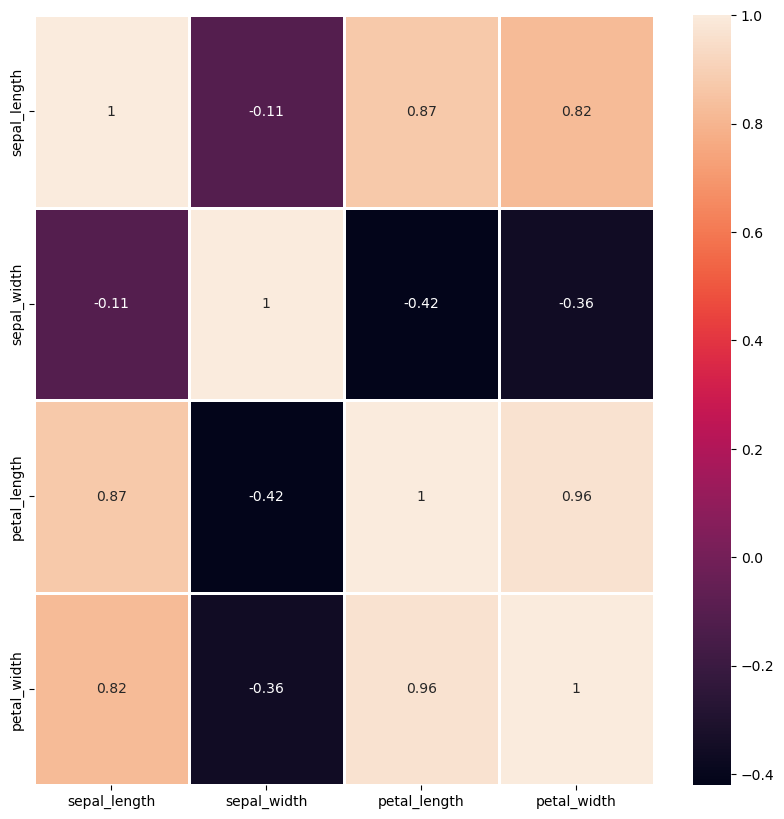

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=1)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

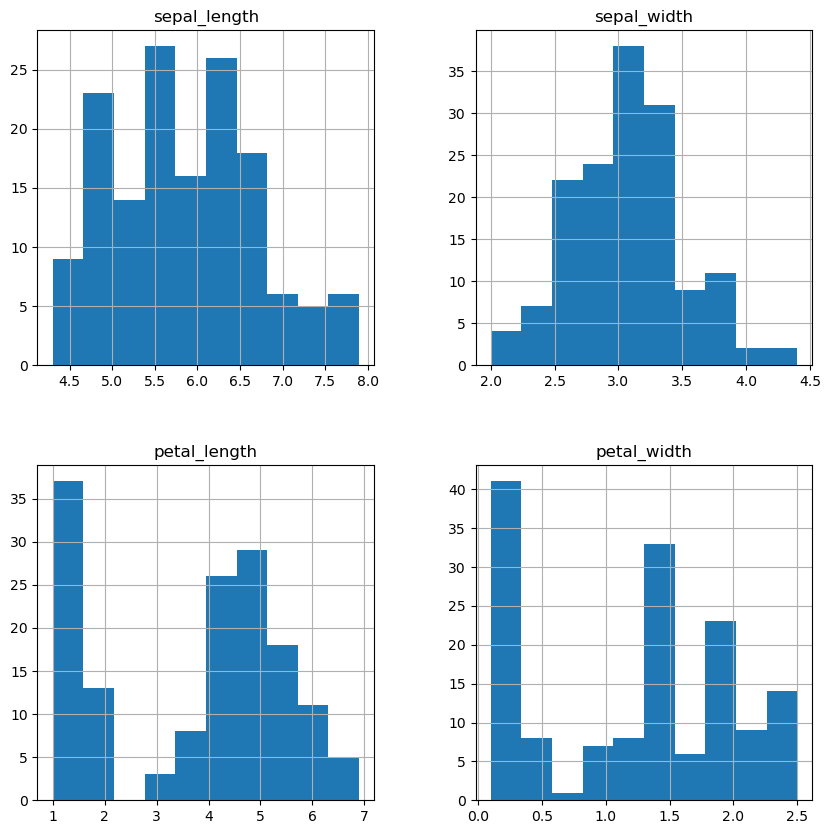

In [11]:
data.hist(figsize=(10,10))

In [12]:
data['sepal_width'] = data['sepal_width'].drop(index=data[data['sepal_width']>=4.0].index)
data['sepal_width'] = data['sepal_width'].drop(index=data[data['sepal_width']<=2.20].index)

<Axes: xlabel='sepal_length', ylabel='Count'>

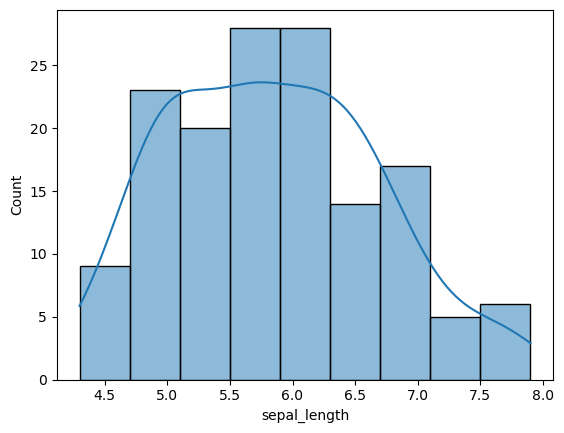

In [13]:
sns.histplot(data['sepal_length'],kde=True)

In [14]:
fitted_data1, fitted_lambda1 = stats.boxcox(data['sepal_length'])
data['sepal_length'] = fitted_data1

<Axes: xlabel='sepal_length', ylabel='Count'>

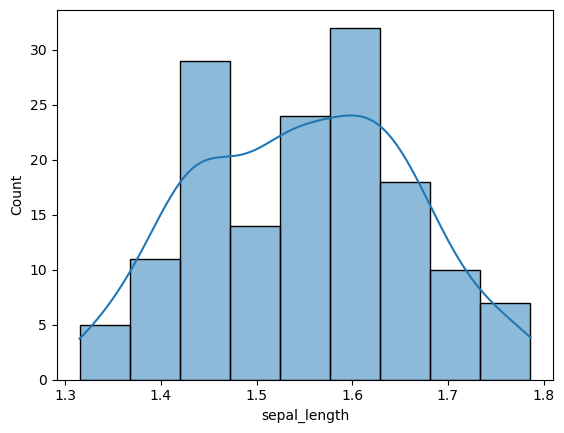

In [15]:
sns.histplot(data['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

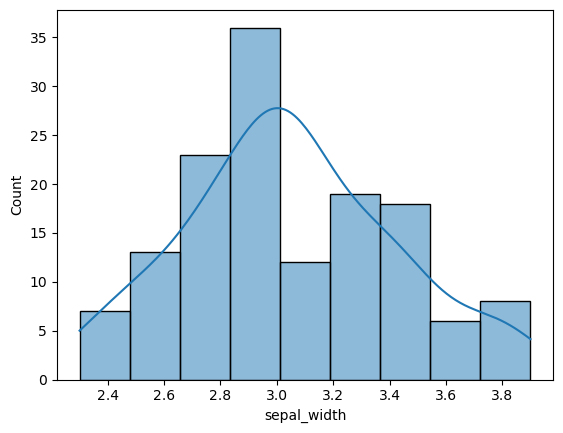

In [16]:
sns.histplot(data['sepal_width'],kde=True)

In [17]:
fitted_data1, fitted_lambda1 = stats.boxcox(data['petal_length'])
data['Petal_length'] = fitted_data1

<Axes: xlabel='Petal_length', ylabel='Count'>

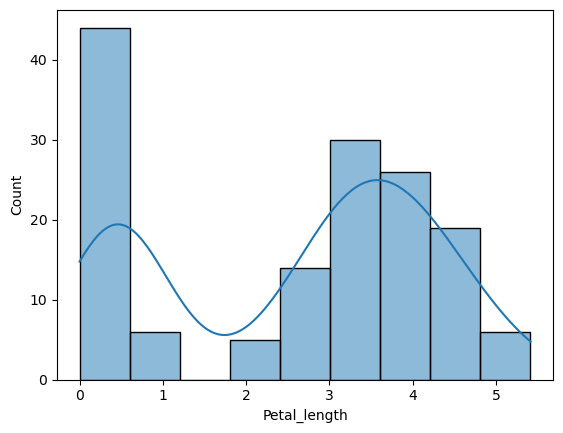

In [18]:
sns.histplot(data['Petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

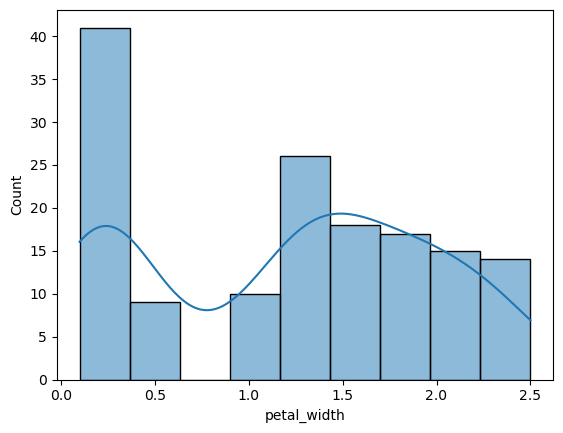

In [19]:
sns.histplot(data['petal_width'],kde=True)

In [20]:
fitted_data1, fitted_lambda1 = stats.boxcox(data['petal_width'])
data['petal_width'] = fitted_data1

<Axes: xlabel='petal_width', ylabel='Count'>

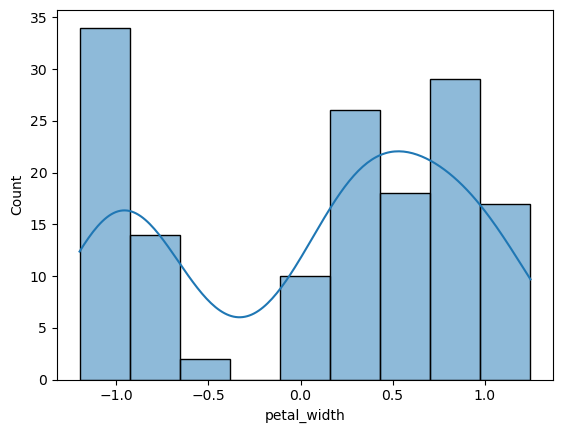

In [21]:
sns.histplot(data['petal_width'],kde=True)

In [22]:
data.head(5)

sepal_length  sepal_width  petal_length  petal_width      species  \
0      1.451378          3.5           1.4    -1.001736  Iris-setosa   
1      1.419686          3.0           1.4    -1.001736  Iris-setosa   
2      1.386477          3.2           1.3    -1.001736  Iris-setosa   
3      1.369260          3.1           1.5    -1.001736  Iris-setosa   
4      1.435713          3.6           1.4    -1.001736  Iris-setosa   

   Petal_length  
0      0.395156  
1      0.395156  
2      0.297195  
3      0.492637  
4      0.395156

In [23]:
data_setosa = data.loc[data['species']=='Iris-setosa']
data_versicolor = data.loc[data['species']=='Iris-versicolor']
data_virginica = data.loc[data['species']=='Iris-virginica']

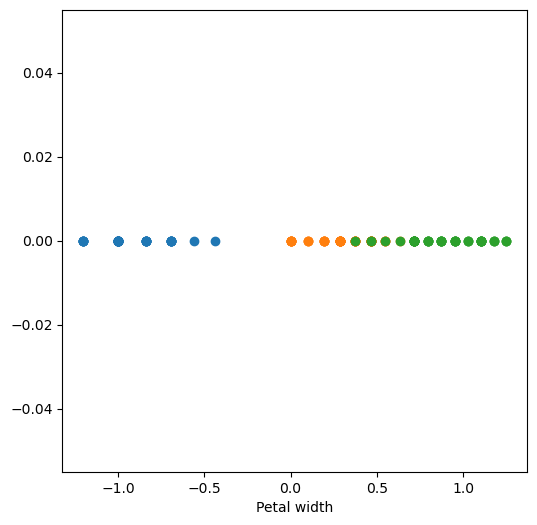

In [24]:
plt.figure(figsize=(6,6))
plt.plot(data_setosa['petal_width'],np.zeros_like(data_setosa['petal_width']),'o')
plt.plot(data_versicolor['petal_width'],np.zeros_like(data_versicolor['petal_width']),'o')
plt.plot(data_virginica['petal_width'],np.zeros_like(data_virginica['petal_width']),'o')
plt.xlabel('Petal width')
plt.show()

<Axes: xlabel='petal_width', ylabel='petal_length'>

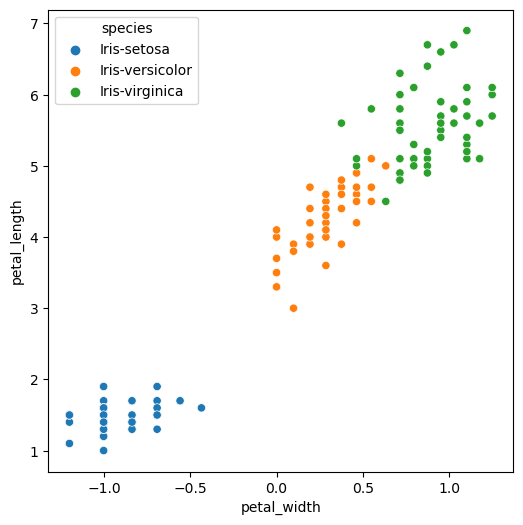

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data['petal_width'],y=data['petal_length'],hue=data['species'])

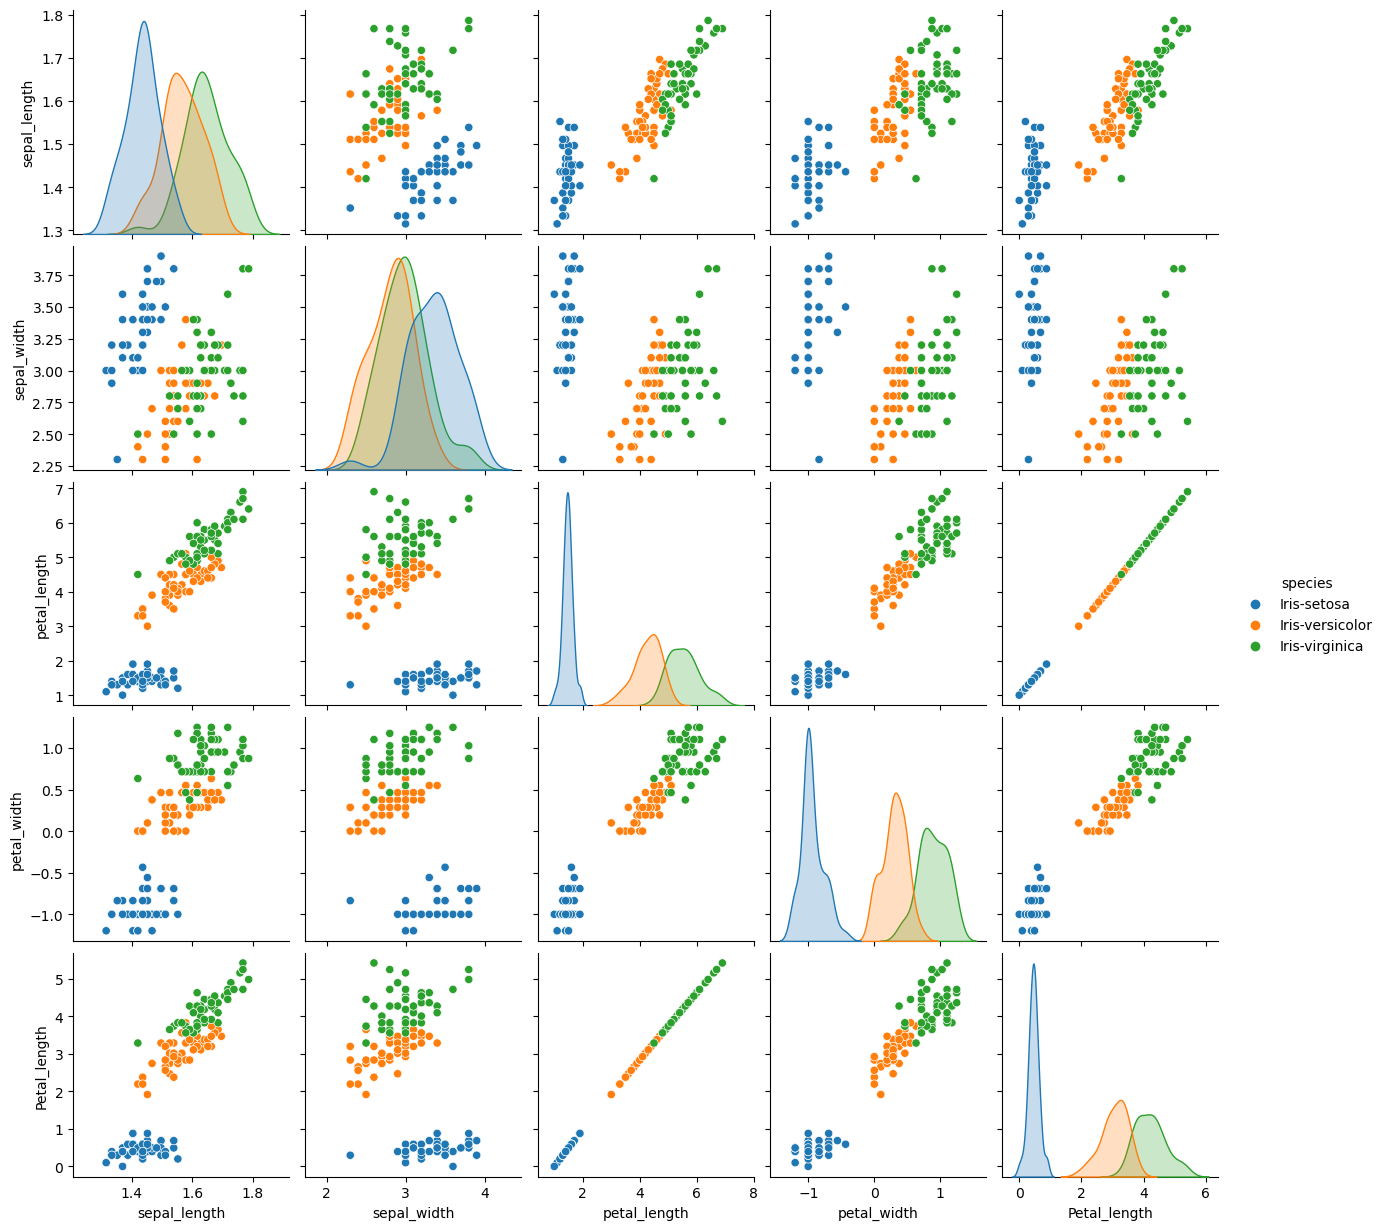

In [26]:
sns.pairplot(data,hue='species')

<Axes: xlabel='species', ylabel='petal_length'>

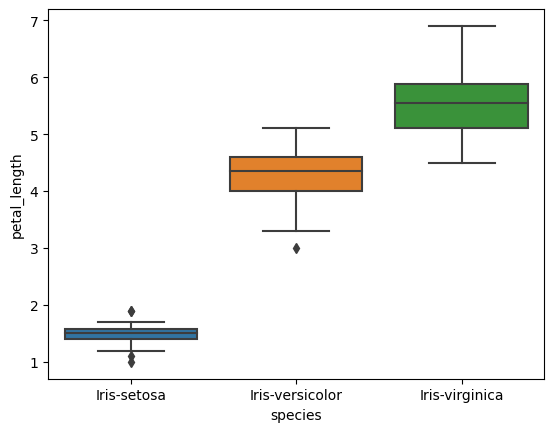

In [27]:
sns.boxplot(x="species", y="petal_length",data=data)

In [28]:
value = [len(data_setosa),len(data_versicolor),len(data_virginica)]
name = ['Setosa','Versicolor','Virginica']

In [29]:
px.pie(data,values = value,names=name,title= "Types of Iris Species")

In [30]:
columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [31]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
le  = LabelEncoder()
data['species']=le.fit_transform(data['species'])

In [32]:
data['species'].unique()

##Here setosa is labeled as 0 , versicolor as 1 and virginica as 2

array([0, 1, 2])

In [33]:
data.head(5)

sepal_length  sepal_width  petal_length  petal_width  species  Petal_length
0      1.451378          3.5           1.4    -1.001736        0      0.395156
1      1.419686          3.0           1.4    -1.001736        0      0.395156
2      1.386477          3.2           1.3    -1.001736        0      0.297195
3      1.369260          3.1           1.5    -1.001736        0      0.492637
4      1.435713          3.6           1.4    -1.001736        0      0.395156

In [34]:
data.isnull().sum()

sepal_length    0
sepal_width     8
petal_length    0
petal_width     0
species         0
Petal_length    0
dtype: int64

In [35]:
data.dropna(inplace=True)

In [36]:
# X = data.drop(['Iris-setosa','Iris-versicolor'],axis=1)
# y = data[['Iris-setosa','Iris-versicolor']]

X = data.drop(['species'],axis=1)
y = data['species']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=[X_train.columns])
X_test=pd.DataFrame(scaler.transform(X_test), columns=[X_test.columns])

<Axes: >

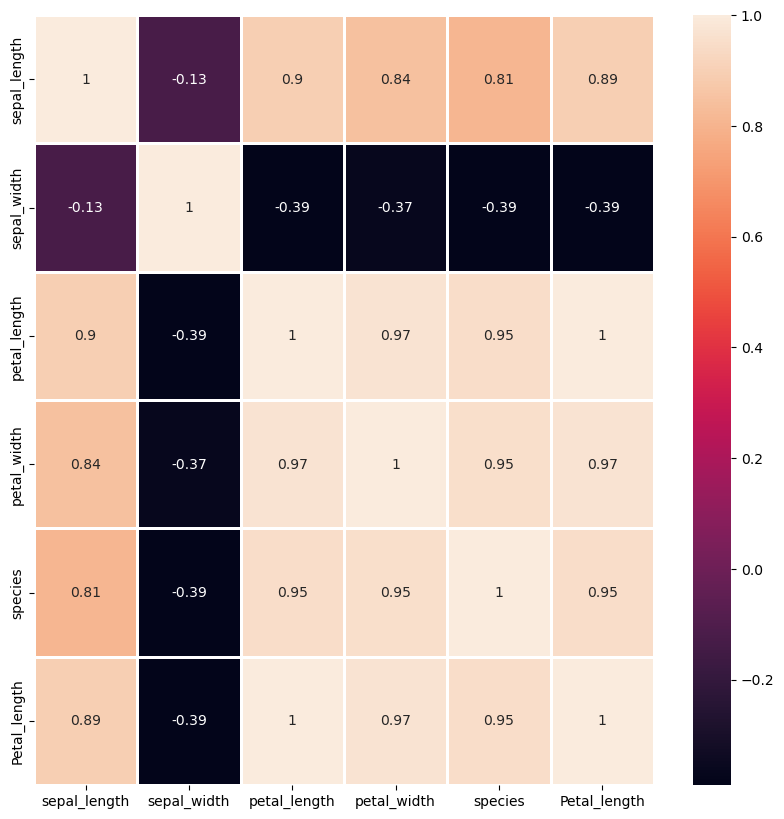

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [42]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

3

In [43]:
selected_feat

MultiIndex([('petal_length',),
            ( 'petal_width',),
            ('Petal_length',)],
           )

In [44]:
col = X_train.columns

In [45]:
type(X_train)

pandas.core.frame.DataFrame

In [46]:
type(X_train.values)

numpy.ndarray

In [47]:
X_train = X_train.values
y_train = y_train.values

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X=X_train, y=y_train)


LogisticRegression()

In [49]:
predicted=lr.predict(X_test)

In [50]:
accuracy_score(y_test,predicted,normalize=True)

1.0

In [51]:
print("Training accuracy: ",lr.score(X_train,y_train)*100,'%')

Training accuracy:  92.92929292929293 %


In [52]:
print("Testing accuracy: ",lr.score(X_test,y_test)*100,'%')

Testing accuracy:  100.0 %
